In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('Data_for_UCI_named.csv')
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [3]:
df.drop(columns=['stab'],inplace=True)
X=df.iloc[:,:12]
y=df['stabf']
df['stabf']= pd.get_dummies(df['stabf'])

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [5]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100) 
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
from sklearn import metrics 
print("ACCURACY OF THE MODEL: ", round(metrics.accuracy_score(y_test, y_pred),4))

ACCURACY OF THE MODEL:  0.922


In [7]:
!pip install lightgbm
from lightgbm import LGBMClassifier
model = LGBMClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
print(accuracy)

0.9395


In [10]:
from sklearn.ensemble import ExtraTreesClassifier
extra_tree_forest = ExtraTreesClassifier(n_estimators = 12,
                                        criterion ='entropy', max_features = 2)
  
extra_tree_forest.fit(X, y)
feature_importance = extra_tree_forest.feature_importances_
feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        extra_tree_forest.estimators_],
                                        axis = 0)
feature_importance_normalized

array([0.00702053, 0.00718967, 0.00530926, 0.0048655 , 0.00350045,
       0.00418769, 0.00467495, 0.00351024, 0.00817136, 0.00637894,
       0.00558677, 0.00412309])

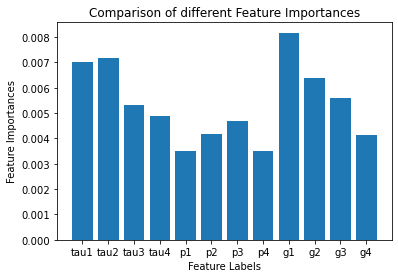

In [11]:
import matplotlib.pyplot as plt
plt.bar(X.columns, feature_importance_normalized)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.show()